In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.shape

(9240, 37)

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Some columns have "Select" as an entry, which indicates that nothing was selected there and should be replaced by Null

In [7]:
select_present = lead_data.apply(lambda col: col.str.count('Select').sum())
select_present_cols = select_present[select_present > 0].index.tolist()
select_present_cols

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

#### Replace Select with null

In [8]:
lead_data[select_present_cols] = lead_data[select_present_cols].replace("Select", np.nan)

In [9]:
lead_data[select_present_cols]

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,NaN,Mumbai
4,NaN,Other,NaN,Mumbai
...,...,...,...,...
9235,IT Projects Management,NaN,Potential Lead,Mumbai
9236,Media and Advertising,NaN,Potential Lead,Mumbai
9237,Business Administration,NaN,Potential Lead,Mumbai
9238,Human Resource Management,Online Search,NaN,Other Metro Cities


### Understandind the data (Shape,info,description)

In [10]:
# Identifying columns with null values and treat them
100*(lead_data.isnull().sum()/lead_data.shape[0]).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### We have a high share of missing values in the dataset. We would either have to drop the columns and impute the missing values

In [11]:
lead_data["How did you hear about X Education"].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

#### 78% missing values and no pattern; hence, it is better to drop the column 

In [12]:
lead_data.drop(["How did you hear about X Education"],axis=1,inplace = True)

In [13]:
lead_data["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### 78% missing values and no pattern; hence, it is better to drop the column 

In [14]:
lead_data.drop(["Lead Profile"],axis=1,inplace = True)

In [15]:
lead_data["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### Given we have an entry that highlights the Not sure attribute, we can change NA to Not Sure

In [16]:
lead_data["Lead Quality"].replace(np.nan,"Not Sure", inplace = True)

In [17]:
lead_data["Lead Quality"].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### Given Assymetrique scores are given based on activities and the basis of score allocation is not provided we can not impute values here and hence would have to drop these cols

In [18]:
lead_data.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1,inplace = True)

In [19]:
lead_data["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Since null values can not be directly categorized anywhere, we will remove city too

In [20]:
lead_data.drop(["City"],axis=1,inplace = True)

In [21]:
lead_data["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Specialization is well distributed and can be utilized for model building, will replace null with not mentioned

In [22]:
lead_data["Specialization"].replace(np.nan,"Not Mentioned", inplace = True)

In [23]:
lead_data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### Tags columns seems like an entry based on service support agents purview and is very situation specific, we will remove it

In [24]:
lead_data.drop(["Tags"],axis=1,inplace = True)

In [25]:
lead_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Will drop as it is dominated by just one group

In [26]:
lead_data.drop(["What matters most to you in choosing a course"],axis=1,inplace = True)

In [27]:
lead_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Will drop as it is dominated by just one group

In [28]:
lead_data.drop(["What is your current occupation"],axis=1,inplace = True)

In [29]:
lead_data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
Philippines                2
Netherlands                2
Italy                      2
Bangladesh                 2
Belgium                    2
Ghana                      2
China                      2
Tanzania                   1
Liberia                    1
Kenya                      1
Switzerland                1
Vietnam                    1
Russia                     1
Malaysia      

#### Will drop as dominated by one group

In [30]:
lead_data.drop(["Country"],axis=1,inplace = True)

#### Given the numerical values only have 1% missing values, we will replace them with median 

In [31]:
TotalVisits_median = lead_data["TotalVisits"].median()

In [32]:
lead_data["TotalVisits"].replace(np.nan,TotalVisits_median, inplace = True)

In [33]:
PageVisit_median = lead_data["Page Views Per Visit"].median()

In [34]:
lead_data["Page Views Per Visit"].replace(np.nan,PageVisit_median, inplace = True)

In [35]:
lead_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Well distributed values, so we can replace null with not sure

In [36]:
lead_data["Last Activity"].replace(np.nan,"Not Sure", inplace = True)

In [37]:
lead_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
blog                    1
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

In [38]:
#Google is present twice so need to replace it 
lead_data["Lead Source"].replace("google","Google", inplace = True)

In [39]:
lead_data["Lead Source"].replace(np.nan,"Not Sure", inplace = True)

#### Dropping columns that are just identifiers

In [40]:
lead_data = lead_data.drop(["Prospect ID","Lead Number"],axis=1)

In [41]:
# Identifying columns with null values and treat them
100*(lead_data.isnull().sum()/lead_data.shape[0]).sort_values(ascending=False)

Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Lead Quality                                0.0
Update me on Supply Chain Content       

### Before converting datasets into binary and dummy variables, identifying trends in dataset

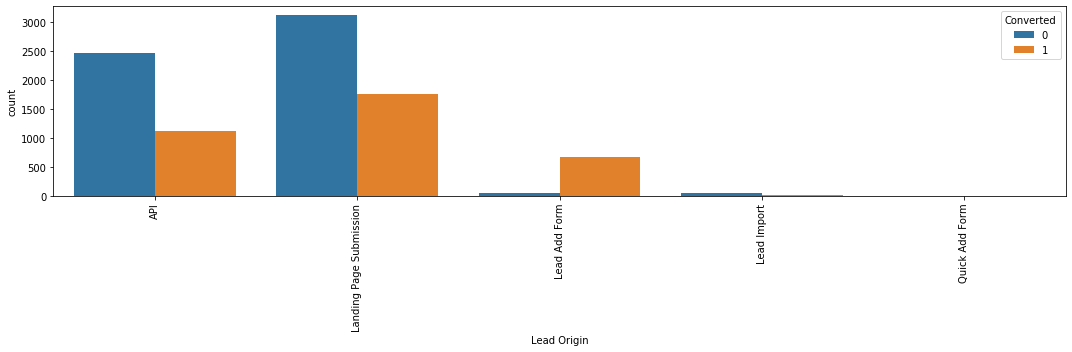

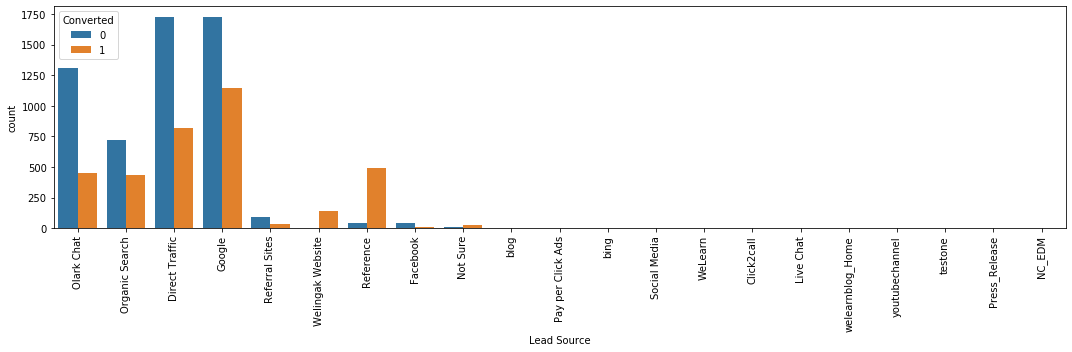

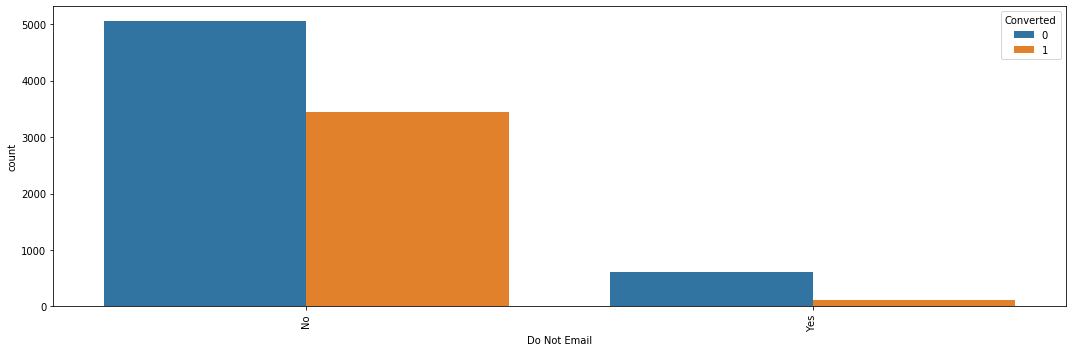

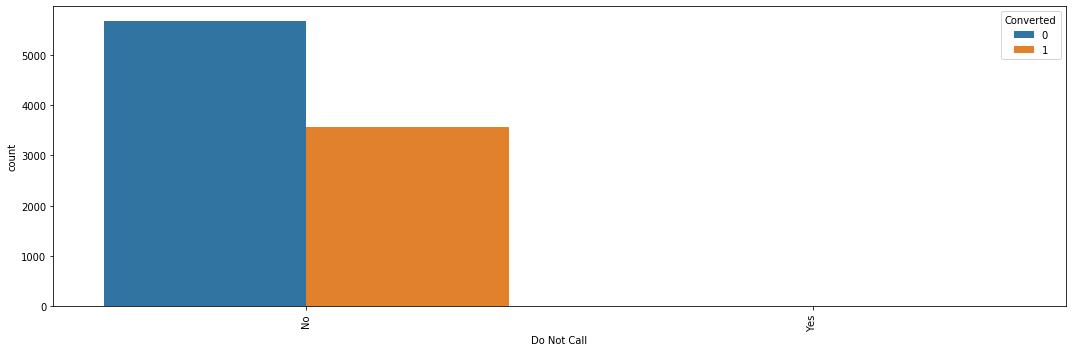

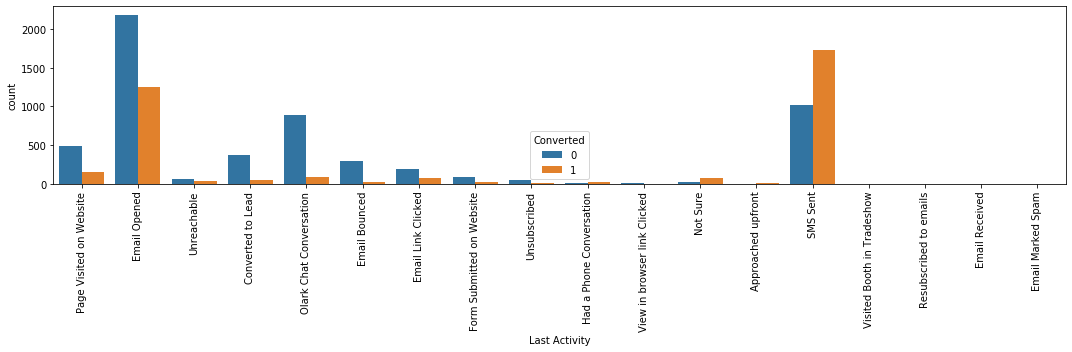

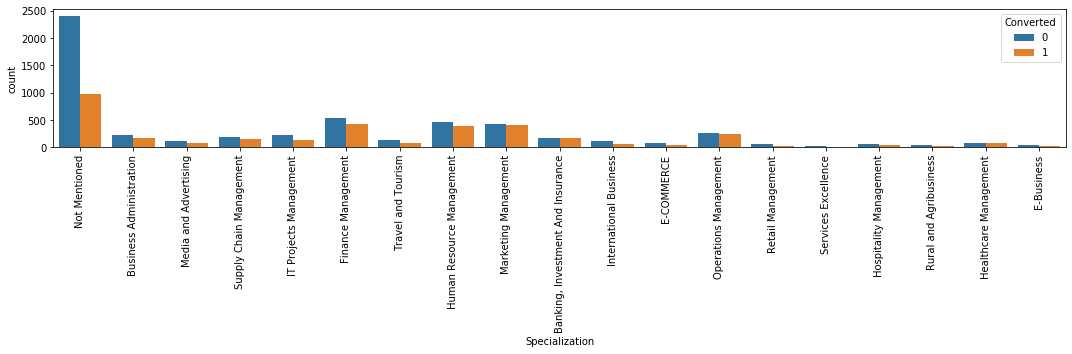

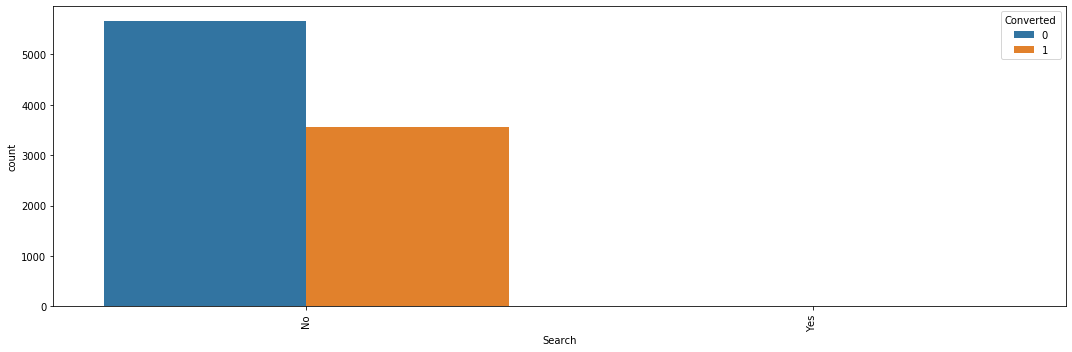

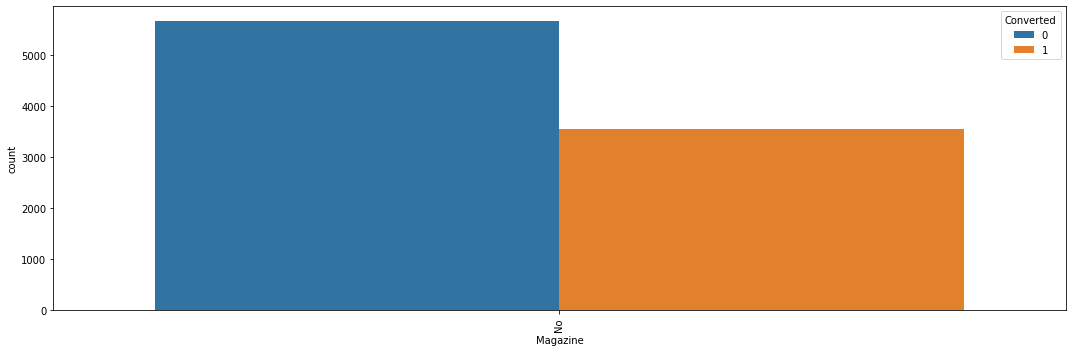

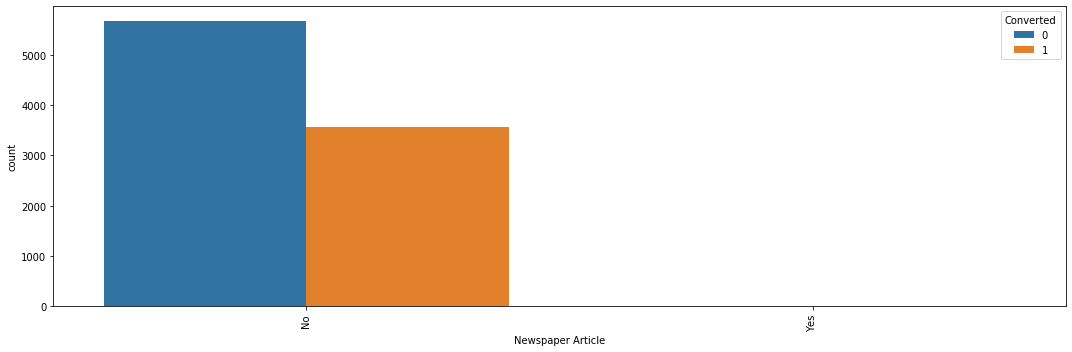

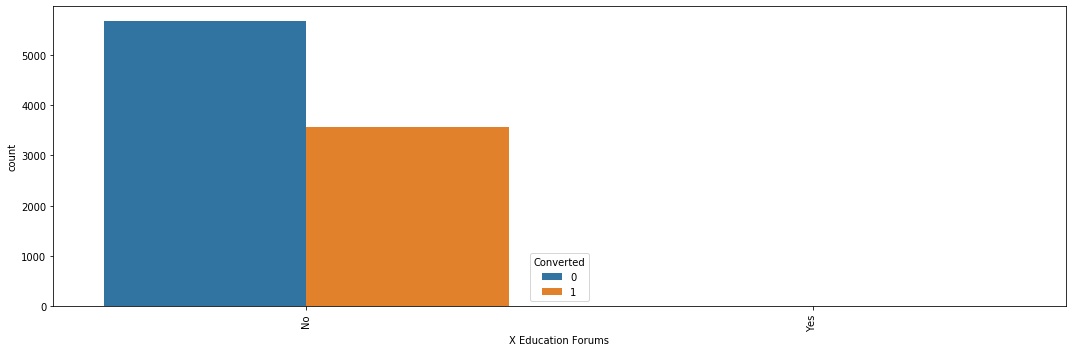

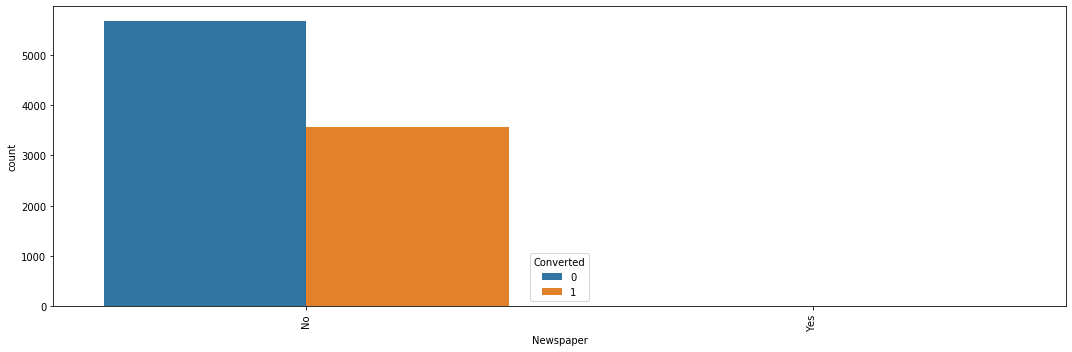

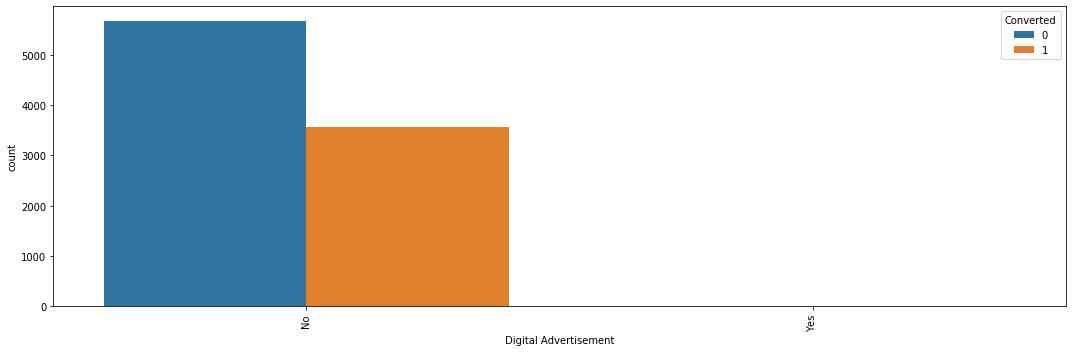

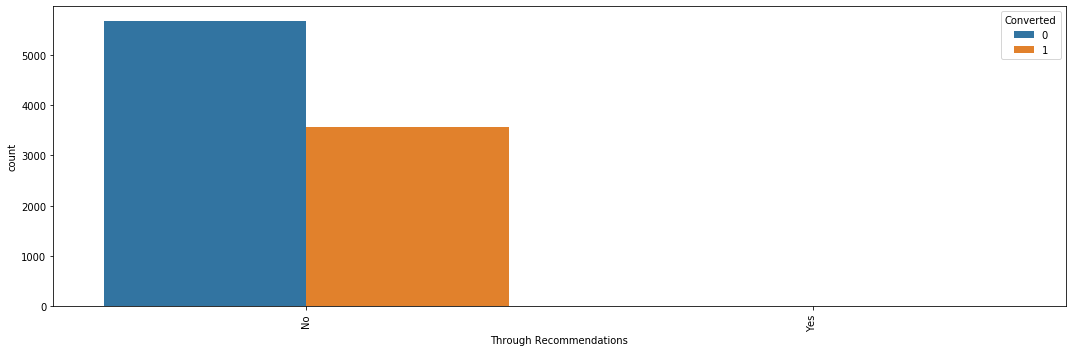

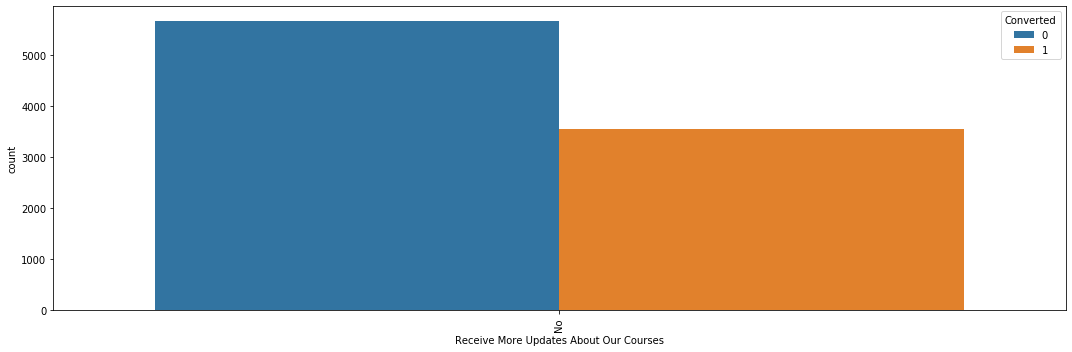

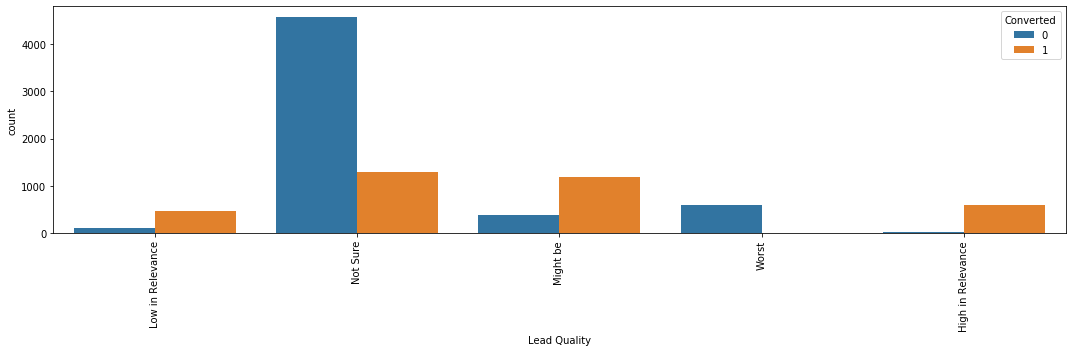

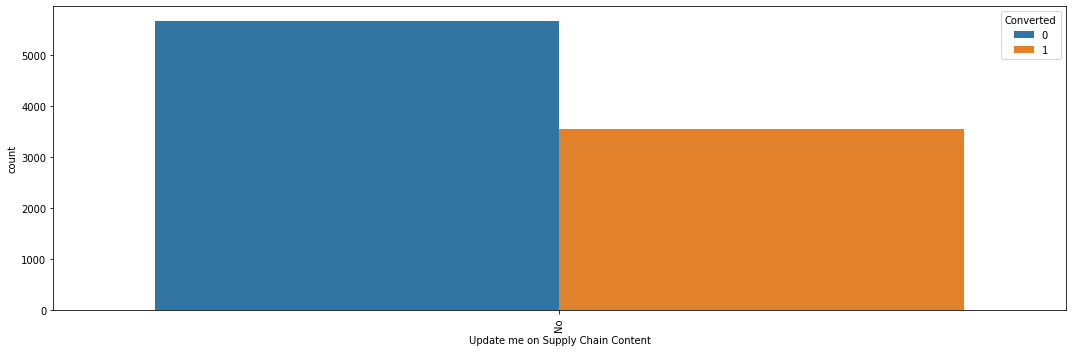

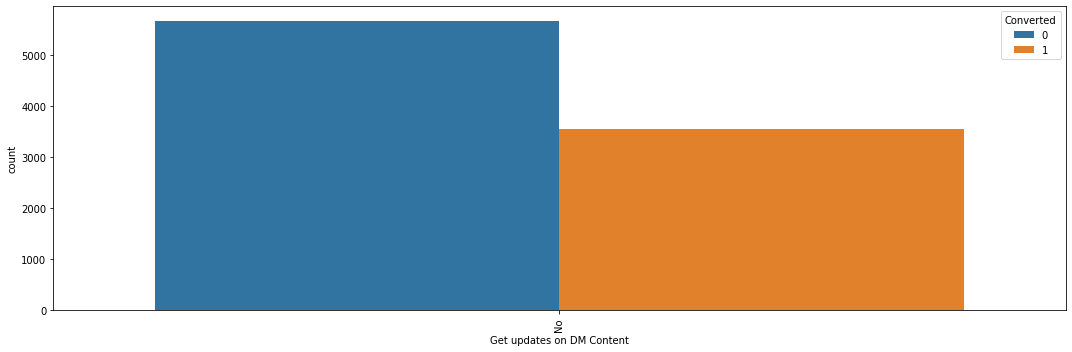

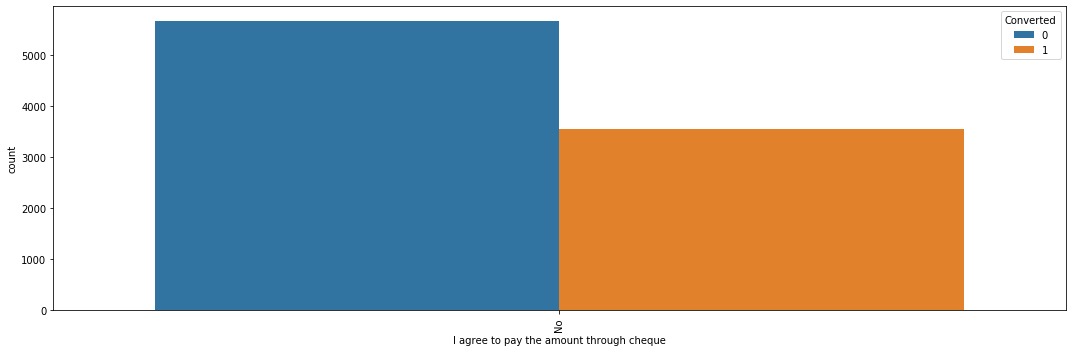

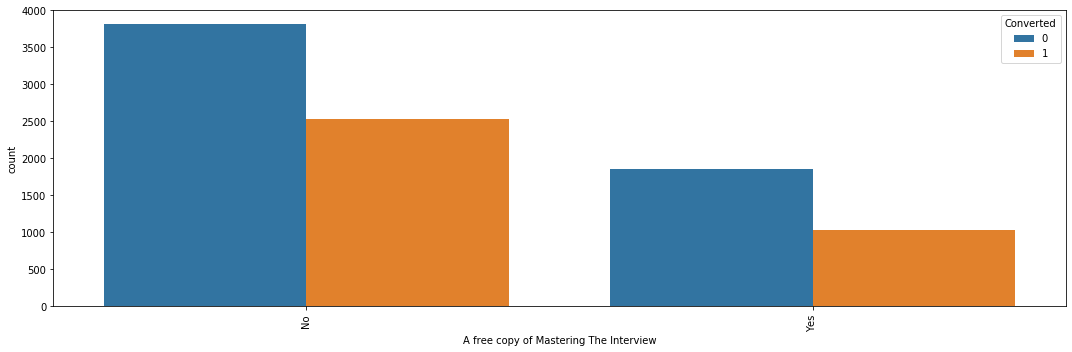

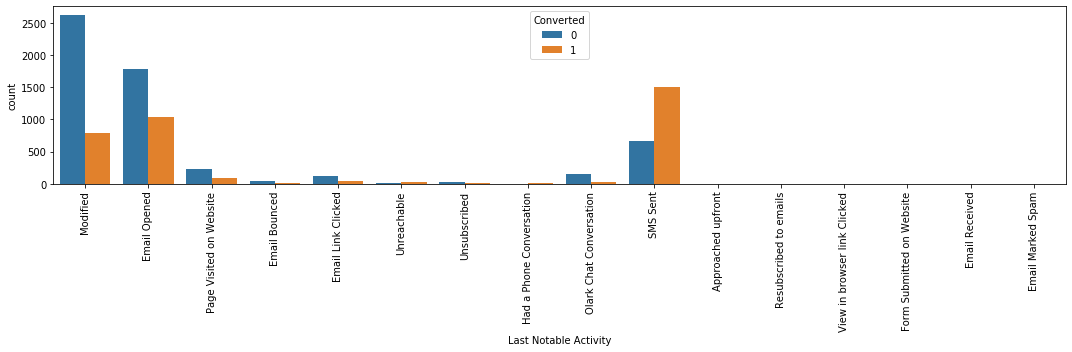

In [42]:
#Visulaizing the cateogarical features against the target feature Converted
temp2 = lead_data.select_dtypes(include ="object").columns
for i in temp2:
    
    plt.figure(figsize =(15,5))
    sns.countplot(lead_data[i], hue=lead_data.Converted)
    plt.xticks(rotation = 90)
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()
    

#### Observation are as follows from EDA
#1. SMS sent feature has the highest conversion,Followed by Email Opened,Modified and page visit
#2.FREE copy of mastering interview features opted as YES also shows healthy conversion
#3.LEAD TO CONVERSION RATIO for these features were noticed to be above 80% 
    Business adminstration,Media & Advertising,Marketing managment, Insurance & banking,ops managment, health care & hospitality managment
#5. LEAD SOURCE feature we observe referals ,Welinkak website have the highest conversion compared to others

### Data Processing

#### We have a lot of object items that needs to be changed to binary

In [43]:
#identifying the cols with no and yes as values
yes_counts = lead_data.apply(lambda col: col.str.count('Yes').sum())
columns_with_yes = yes_counts[yes_counts > 0].index.tolist()
columns_with_yes

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [44]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[columns_with_yes] = lead_data[columns_with_yes].apply(binary_map)

In [45]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,...,0,0,0,No,Low in Relevance,No,No,No,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Mentioned,...,0,0,0,No,Not Sure,No,No,No,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,No,Might be,No,No,No,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,No,Not Sure,No,No,No,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,...,0,0,0,No,Might be,No,No,No,0,Modified


#### Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque columns have only No so we will drop these as well 

In [46]:
lead_data = lead_data.drop(["Magazine", "Receive More Updates About Our Courses",
                            "Update me on Supply Chain Content", "Get updates on DM Content",
                            "I agree to pay the amount through cheque"],axis=1)

In [47]:
dummycols = lead_data.select_dtypes(include = "object").columns.tolist()
dummycols_df = lead_data[dummycols]
dummycols_df

,Lead Origin,Lead Source,Last Activity,Specialization,Lead Quality,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Not Mentioned,Low in Relevance,Modified
1,API,Organic Search,Email Opened,Not Mentioned,Not Sure,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Might be,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Not Sure,Modified
4,Landing Page Submission,Google,Converted to Lead,Not Mentioned,Might be,Modified
...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,High in Relevance,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Might be,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Not Sure,SMS Sent
9238,Landing Page Submission,Google,SMS Sent,Human Resource Management,Not Sure,SMS Sent


In [48]:
def create_dummy_variables(data, columns):
    # Initialize an empty DataFrame to store the dummy variables
    dummy_df = pd.DataFrame()

    for col in columns:
        # Create dummy variables using pandas' get_dummies() function
        dummy = pd.get_dummies(data[col], prefix=col, drop_first=True)
        
        # Concatenate the dummy variables to the dummy_df DataFrame
        dummy_df = pd.concat([dummy_df, dummy], axis=1)

    return pd.concat([data, dummy_df], axis=1)


In [49]:
dumdf = create_dummy_variables(dummycols_df,dummycols)

In [50]:
dumdf.drop(dummycols,axis = 1, inplace=True)

In [51]:
dumdf.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Not Sure,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Merging datasets

In [52]:
lead_data = pd.concat([lead_data,dumdf],axis=1)

In [53]:
lead_data.shape

(9240, 97)

In [54]:
lead_data.drop(dummycols,axis = 1, inplace=True)

In [55]:
lead_data.shape

(9240, 91)

#### Identifying Outliers

In [56]:
num_cols = valid_numeric_cols = [col for col in lead_data.select_dtypes(include=['int64', 'float64']).columns if lead_data[col].nunique() > 2]


In [57]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [58]:
def create_box_plots(data, columns):
    for col in columns:
        fig, ax = plt.subplots(figsize=(6, 4))
        data.boxplot(column=col, ax=ax)
        ax.set_title(f"Box Plot of {col}")
        plt.show()

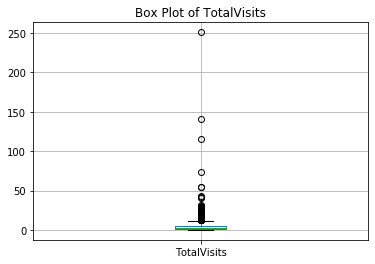

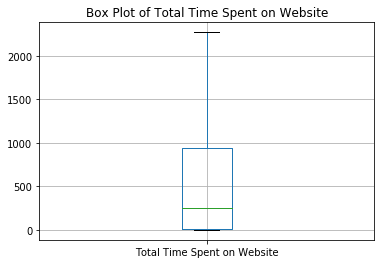

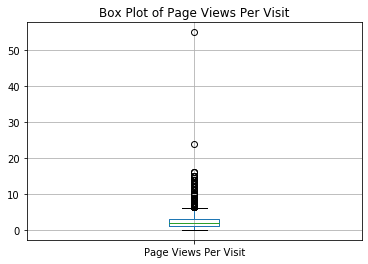

In [59]:
create_box_plots(lead_data,num_cols)

In [60]:
lead_data[num_cols].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### Based on the 99% figures we can see that it can be used to remove outliers

In [61]:
#Removing values higher than 99 percentile
def drop_outliers_by_99percentile(data, columns):
    for col in columns:
        percentile_99 = data[col].quantile(0.99)
        data = data[data[col] <= percentile_99]

    return data

In [62]:
lead_data = drop_outliers_by_99percentile(lead_data,num_cols)

In [63]:
lead_data.shape

(8998, 91)

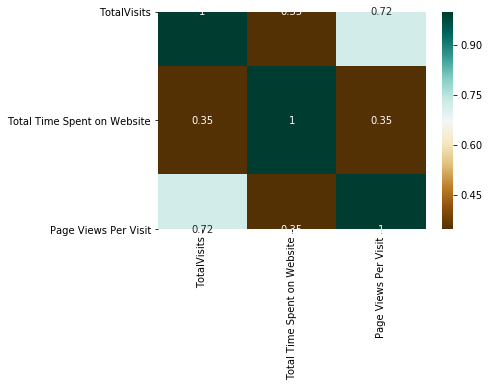

In [64]:
#Identifying correlations between num_cols
sns.heatmap(lead_data[num_cols].corr(),annot=True,cmap="BrBG")
plt.show()

#### Page Views Per Visit and Total Visits have a high correlation and we might have to drop one from the model 

### Building Model

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
#Count of columns in the final dataset
len(lead_data.columns.tolist())

91

In [67]:
#Defining the y variable
y = lead_data["Converted"]

In [68]:
# Putting feature variable to X
X = lead_data.drop("Converted",axis =1)

In [69]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
#Scaling numeric variables
scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4714,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5794,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
876,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7767,0,0,0.764706,0.460033,0.181111,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7895,0,0,0.117647,0.603589,0.222222,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### Automatic variable selection using RFE

In [73]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 24),
 ('Newspaper Article', False, 64),
 ('X Education Forums', False, 63),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 52),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('Lead Origin_Quick Add Form', False, 62),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 69),
 ('Lead Source_Not Sure', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Pay per Click Ads', False, 68),
 ('Lead Source_Press_Release', False, 60),
 ('L

In [75]:
col = X_train.columns[rfe.support_]

In [76]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Newspaper', 'Through Recommendations',
       'Lead Origin_Lead Add Form', 'Lead Source_Not Sure',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Not Sure', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_View in browser link Clicked',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form

In [78]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.1
Date:                Tue, 18 Jul 2023   Deviance:                       4202.2
Time:                        09:14:33   Pearson chi2:                 6.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3121      0.163      1.919      0.055      -0.007       0.631
Do Not Email                                      -1.1883      0.185     -6.438      0.000      -1.550      -0.827
TotalVisits                                        1.4539      0.337      4.318      0.000       0.794       2.114
Total Time Spent on Website                        3.8660      0.158     24.537      0.000       3.557       4.175
Page Views Per Visit                              -1.4852      0.304     -4.893      0.000      -2.080      -0.890
Newspaper                                        -23.6145   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Through Recommendations                           21.9195   2.15e+04      0.001      0.999   -4.21e+04    4.21e+04
Lead Origin_Lead Add Form                          2.7647      0.257     10.773      0.000       2.262       3.268
Lead Source_Not Sure                               0.9915      0.723      1.372      0.170      -0.425       2.408
Lead Source_Olark Chat                             1.4167      0.143      9.913      0.000       1.137       1.697
Lead Source_Welingak Website                       4.3983      1.037      4.241      0.000       2.366       6.431
Last Activity_Not Sure                            -1.8102      0.488     -3.706      0.000      -2.767      -0.853
Last Activity_Olark Chat Conversation             -1.2341      0.182     -6.785      0.000      -1.591      -0.878
Last Activity_SMS Sent                             0.4349      0.152      2.863      0.004       0.137       0.733
Last Activity_View in browser link Clicked       -22.4482   1.89e+04     -0.001      0.999    -3.7e+04     3.7e+04
Lead Quality_Might be                             -1.3692      0.152     -8.991      0.000      -1.668      -1.071
Lead Quality_Not Sure                             -3.3786      0.136    -24.924      0.000      -3.644      -3.113
Lead Quality_Worst                                -5.5328      0.391    -14.166      0.000      -6.298      -4.767
Last Notable Activity_Had a Phone Conversation     2.5851      1.227      2.106      0.035       0.180       4.991
Last Notable Activity_SMS Sent                     1.3896      0.160      8.712      0.000       1.077       1.702
Last Notable Activity_Unreachable                  1.4068      0.557      2.527      0.011       0.316       2.498
==================================================================================================================
"""

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.78
12,Last Activity_SMS Sent,5.24
1,TotalVisits,4.89
18,Last Notable Activity_SMS Sent,4.73
15,Lead Quality_Not Sure,3.37
2,Total Time Spent on Website,2.10
8,Lead Source_Olark Chat,1.96
14,Lead Quality_Might be,1.85
6,Lead Origin_Lead Add Form,1.60
11,Last Activity_Olark Chat Conversation,1.46


#### Model 2 without Last Activity_SMS Sent	as it has high VIF

In [81]:
X_train = X_train.drop("Last Activity_SMS Sent",axis=1)
col = col.drop("Last Activity_SMS Sent")

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2105.1
Date:                Tue, 18 Jul 2023   Deviance:                       4210.2
Time:                        09:14:34   Pearson chi2:                 6.31e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3300      0.163      2.030      0.042       0.011       0.649
Do Not Email                                      -1.1854      0.184     -6.440      0.000      -1.546      -0.825
TotalVisits                                        1.4294      0.336      4.255      0.000       0.771       2.088
Total Time Spent on Website                        3.8692      0.158     24.557      0.000       3.560       4.178
Page Views Per Visit                              -1.4546      0.303     -4.795      0.000      -2.049      -0.860
Newspaper                                        -23.6644   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Through Recommendations                           21.8582   2.15e+04      0.001      0.999   -4.21e+04    4.22e+04
Lead Origin_Lead Add Form                          2.8179      0.257     10.968      0.000       2.314       3.322
Lead Source_Not Sure                               0.9898      0.723      1.369      0.171      -0.428       2.407
Lead Source_Olark Chat                             1.4091      0.143      9.879      0.000       1.130       1.689
Lead Source_Welingak Website                       4.3960      1.037      4.239      0.000       2.363       6.429
Last Activity_Not Sure                            -1.8911      0.489     -3.869      0.000      -2.849      -0.933
Last Activity_Olark Chat Conversation             -1.2783      0.181     -7.063      0.000      -1.633      -0.924
Last Activity_View in browser link Clicked       -22.4628   1.89e+04     -0.001      0.999   -3.71e+04     3.7e+04
Lead Quality_Might be                             -1.3253      0.151     -8.750      0.000      -1.622      -1.028
Lead Quality_Not Sure                             -3.3467      0.135    -24.802      0.000      -3.611      -3.082
Lead Quality_Worst                                -5.5295      0.390    -14.161      0.000      -6.295      -4.764
Last Notable Activity_Had a Phone Conversation     2.5262      1.228      2.057      0.040       0.120       4.933
Last Notable Activity_SMS Sent                     1.7666      0.092     19.288      0.000       1.587       1.946
Last Notable Activity_Unreachable                  1.3528      0.556      2.433      0.015       0.263       2.443
==================================================================================================================
"""

In [83]:
#Checking VIF for manual fine tuning
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.77
1,TotalVisits,4.89
14,Lead Quality_Not Sure,3.30
2,Total Time Spent on Website,2.10
8,Lead Source_Olark Chat,1.96
13,Lead Quality_Might be,1.82
6,Lead Origin_Lead Add Form,1.58
17,Last Notable Activity_SMS Sent,1.54
11,Last Activity_Olark Chat Conversation,1.45
9,Lead Source_Welingak Website,1.29


#### Model 3 - Without Newspaper as it is not significant

In [84]:
X_train = X_train.drop("Newspaper",axis=1)
col = col.drop("Newspaper")

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2106.5
Date:                Tue, 18 Jul 2023   Deviance:                       4213.0
Time:                        09:14:34   Pearson chi2:                 6.31e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3353      0.162      2.064      0.039       0.017       0.654
Do Not Email                                      -1.1844      0.184     -6.436      0.000      -1.545      -0.824
TotalVisits                                        1.4040      0.335      4.185      0.000       0.746       2.062
Total Time Spent on Website                        3.8596      0.157     24.528      0.000       3.551       4.168
Page Views Per Visit                              -1.4436      0.303     -4.762      0.000      -2.038      -0.849
Through Recommendations                           21.8608   2.15e+04      0.001      0.999   -4.21e+04    4.22e+04
Lead Origin_Lead Add Form                          2.8133      0.257     10.951      0.000       2.310       3.317
Lead Source_Not Sure                               0.9897      0.723      1.368      0.171      -0.428       2.407
Lead Source_Olark Chat                             1.4053      0.143      9.856      0.000       1.126       1.685
Lead Source_Welingak Website                       4.3965      1.037      4.239      0.000       2.364       6.429
Last Activity_Not Sure                            -1.8863      0.489     -3.861      0.000      -2.844      -0.929
Last Activity_Olark Chat Conversation             -1.2770      0.181     -7.058      0.000      -1.632      -0.922
Last Activity_View in browser link Clicked       -22.4642   1.89e+04     -0.001      0.999   -3.71e+04     3.7e+04
Lead Quality_Might be                             -1.3255      0.151     -8.755      0.000      -1.622      -1.029
Lead Quality_Not Sure                             -3.3479      0.135    -24.819      0.000      -3.612      -3.084
Lead Quality_Worst                                -5.5271      0.390    -14.159      0.000      -6.292      -4.762
Last Notable Activity_Had a Phone Conversation     2.5244      1.228      2.056      0.040       0.118       4.930
Last Notable Activity_SMS Sent                     1.7672      0.092     19.301      0.000       1.588       1.947
Last Notable Activity_Unreachable                  1.3535      0.556      2.433      0.015       0.263       2.444
==================================================================================================================
"""

In [86]:
#Checking VIF for manual fine tuning
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.76
1,TotalVisits,4.88
13,Lead Quality_Not Sure,3.30
2,Total Time Spent on Website,2.10
7,Lead Source_Olark Chat,1.96
12,Lead Quality_Might be,1.82
5,Lead Origin_Lead Add Form,1.58
16,Last Notable Activity_SMS Sent,1.54
10,Last Activity_Olark Chat Conversation,1.45
8,Lead Source_Welingak Website,1.29


#### Model 4 - without Through Recommendations as it is not significant

In [87]:
X_train = X_train.drop("Through Recommendations",axis=1)
col = col.drop("Through Recommendations")

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2108.1
Date:                Tue, 18 Jul 2023   Deviance:                       4216.2
Time:                        09:14:35   Pearson chi2:                 6.31e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3339      0.162      2.057      0.040       0.016       0.652
Do Not Email                                      -1.1860      0.184     -6.443      0.000      -1.547      -0.825
TotalVisits                                        1.4158      0.335      4.224      0.000       0.759       2.073
Total Time Spent on Website                        3.8584      0.157     24.533      0.000       3.550       4.167
Page Views Per Visit                              -1.4453      0.302     -4.778      0.000      -2.038      -0.852
Lead Origin_Lead Add Form                          2.8118      0.257     10.946      0.000       2.308       3.315
Lead Source_Not Sure                               0.9908      0.723      1.369      0.171      -0.427       2.409
Lead Source_Olark Chat                             1.4057      0.142      9.868      0.000       1.127       1.685
Lead Source_Welingak Website                       4.3988      1.037      4.242      0.000       2.366       6.431
Last Activity_Not Sure                            -1.8872      0.488     -3.863      0.000      -2.845      -0.930
Last Activity_Olark Chat Conversation             -1.2788      0.181     -7.067      0.000      -1.633      -0.924
Last Activity_View in browser link Clicked       -21.4636   1.15e+04     -0.002      0.999   -2.25e+04    2.24e+04
Lead Quality_Might be                             -1.3157      0.151     -8.696      0.000      -1.612      -1.019
Lead Quality_Not Sure                             -3.3469      0.135    -24.814      0.000      -3.611      -3.083
Lead Quality_Worst                                -5.5269      0.390    -14.159      0.000      -6.292      -4.762
Last Notable Activity_Had a Phone Conversation     2.5188      1.229      2.050      0.040       0.111       4.927
Last Notable Activity_SMS Sent                     1.7638      0.092     19.269      0.000       1.584       1.943
Last Notable Activity_Unreachable                  1.3650      0.552      2.471      0.013       0.282       2.448
==================================================================================================================
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.76
1,TotalVisits,4.88
12,Lead Quality_Not Sure,3.30
2,Total Time Spent on Website,2.10
6,Lead Source_Olark Chat,1.96
11,Lead Quality_Might be,1.82
4,Lead Origin_Lead Add Form,1.58
15,Last Notable Activity_SMS Sent,1.54
9,Last Activity_Olark Chat Conversation,1.45
7,Lead Source_Welingak Website,1.29


#### Model 5 - without Last Activity_View in browser link Clicked as it is not significant

In [90]:
X_train = X_train.drop("Last Activity_View in browser link Clicked",axis=1)
col = col.drop("Last Activity_View in browser link Clicked")

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.2
Date:                Tue, 18 Jul 2023   Deviance:                       4220.3
Time:                        09:14:35   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3206      0.162      1.980      0.048       0.003       0.638
Do Not Email                                      -1.1849      0.184     -6.439      0.000      -1.546      -0.824
TotalVisits                                        1.4161      0.335      4.228      0.000       0.760       2.073
Total Time Spent on Website                        3.8590      0.157     24.553      0.000       3.551       4.167
Page Views Per Visit                              -1.4424      0.302     -4.772      0.000      -2.035      -0.850
Lead Origin_Lead Add Form                          2.8157      0.257     10.967      0.000       2.313       3.319
Lead Source_Not Sure                               0.9868      0.723      1.364      0.173      -0.431       2.405
Lead Source_Olark Chat                             1.3988      0.142      9.825      0.000       1.120       1.678
Lead Source_Welingak Website                       4.3937      1.037      4.237      0.000       2.361       6.426
Last Activity_Not Sure                            -1.8836      0.488     -3.858      0.000      -2.840      -0.927
Last Activity_Olark Chat Conversation             -1.2726      0.181     -7.035      0.000      -1.627      -0.918
Lead Quality_Might be                             -1.3036      0.151     -8.640      0.000      -1.599      -1.008
Lead Quality_Not Sure                             -3.3339      0.134    -24.814      0.000      -3.597      -3.071
Lead Quality_Worst                                -5.5137      0.390    -14.132      0.000      -6.278      -4.749
Last Notable Activity_Had a Phone Conversation     2.5199      1.228      2.052      0.040       0.113       4.927
Last Notable Activity_SMS Sent                     1.7645      0.092     19.280      0.000       1.585       1.944
Last Notable Activity_Unreachable                  1.3668      0.552      2.475      0.013       0.284       2.449
==================================================================================================================
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.76
1,TotalVisits,4.88
11,Lead Quality_Not Sure,3.30
2,Total Time Spent on Website,2.10
6,Lead Source_Olark Chat,1.96
10,Lead Quality_Might be,1.82
4,Lead Origin_Lead Add Form,1.58
14,Last Notable Activity_SMS Sent,1.54
9,Last Activity_Olark Chat Conversation,1.45
7,Lead Source_Welingak Website,1.29


#### Model 6 without Lead Source_Not Sure	

In [93]:
X_train = X_train.drop("Lead Source_Not Sure",axis=1)
col = col.drop("Lead Source_Not Sure")

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2111.2
Date:                Tue, 18 Jul 2023   Deviance:                       4222.4
Time:                        09:14:36   Pearson chi2:                 6.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3123      0.162      1.931      0.054      -0.005       0.629
Do Not Email                                      -1.1545      0.181     -6.369      0.000      -1.510      -0.799
TotalVisits                                        1.4171      0.335      4.233      0.000       0.761       2.073
Total Time Spent on Website                        3.8555      0.157     24.558      0.000       3.548       4.163
Page Views Per Visit                              -1.4415      0.302     -4.773      0.000      -2.033      -0.850
Lead Origin_Lead Add Form                          2.9300      0.249     11.750      0.000       2.441       3.419
Lead Source_Olark Chat                             1.3968      0.142      9.818      0.000       1.118       1.676
Lead Source_Welingak Website                       4.2924      1.036      4.144      0.000       2.262       6.323
Last Activity_Not Sure                            -1.9645      0.490     -4.012      0.000      -2.924      -1.005
Last Activity_Olark Chat Conversation             -1.2724      0.181     -7.035      0.000      -1.627      -0.918
Lead Quality_Might be                             -1.2965      0.151     -8.591      0.000      -1.592      -1.001
Lead Quality_Not Sure                             -3.3240      0.134    -24.777      0.000      -3.587      -3.061
Lead Quality_Worst                                -5.5059      0.390    -14.116      0.000      -6.270      -4.741
Last Notable Activity_Had a Phone Conversation     2.5209      1.228      2.053      0.040       0.115       4.927
Last Notable Activity_SMS Sent                     1.7643      0.091     19.292      0.000       1.585       1.944
Last Notable Activity_Unreachable                  1.3667      0.552      2.475      0.013       0.285       2.449
==================================================================================================================
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.76
1,TotalVisits,4.88
10,Lead Quality_Not Sure,3.29
2,Total Time Spent on Website,2.10
5,Lead Source_Olark Chat,1.96
9,Lead Quality_Might be,1.82
13,Last Notable Activity_SMS Sent,1.54
4,Lead Origin_Lead Add Form,1.51
8,Last Activity_Olark Chat Conversation,1.45
6,Lead Source_Welingak Website,1.28


#### Model 7 without Page Views Per Visit as it has high VIF

In [96]:
X_train = X_train.drop("Page Views Per Visit",axis=1)
col = col.drop("Page Views Per Visit")

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2122.8
Date:                Tue, 18 Jul 2023   Deviance:                       4245.7
Time:                        09:14:36   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0270      0.150      0.180      0.857      -0.267       0.321
Do Not Email                                      -1.1583      0.181     -6.416      0.000      -1.512      -0.804
TotalVisits                                        0.5565      0.280      1.989      0.047       0.008       1.105
Total Time Spent on Website                        3.8573      0.157     24.604      0.000       3.550       4.165
Lead Origin_Lead Add Form                          3.1958      0.243     13.162      0.000       2.720       3.672
Lead Source_Olark Chat                             1.6538      0.133     12.456      0.000       1.394       1.914
Lead Source_Welingak Website                       4.2698      1.035      4.124      0.000       2.241       6.299
Last Activity_Not Sure                            -2.0684      0.497     -4.162      0.000      -3.043      -1.094
Last Activity_Olark Chat Conversation             -1.2509      0.180     -6.942      0.000      -1.604      -0.898
Lead Quality_Might be                             -1.2943      0.151     -8.593      0.000      -1.589      -0.999
Lead Quality_Not Sure                             -3.2936      0.134    -24.668      0.000      -3.555      -3.032
Lead Quality_Worst                                -5.4473      0.390    -13.970      0.000      -6.212      -4.683
Last Notable Activity_Had a Phone Conversation     2.4607      1.247      1.973      0.048       0.016       4.905
Last Notable Activity_SMS Sent                     1.7211      0.090     19.047      0.000       1.544       1.898
Last Notable Activity_Unreachable                  1.2954      0.557      2.325      0.020       0.204       2.387
==================================================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Not Sure,2.90
1,TotalVisits,2.76
2,Total Time Spent on Website,2.05
4,Lead Source_Olark Chat,1.85
8,Lead Quality_Might be,1.74
12,Last Notable Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.49
7,Last Activity_Olark Chat Conversation,1.44
5,Lead Source_Welingak Website,1.27
6,Last Activity_Not Sure,1.17


#### Model 8 without Last Notable Activity_Unreachable as it is not significant

In [99]:
X_train = X_train.drop("Last Notable Activity_Unreachable",axis=1)
col = col.drop("Last Notable Activity_Unreachable")

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6298
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2125.6
Date:                Tue, 18 Jul 2023   Deviance:                       4251.1
Time:                        09:14:37   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0406      0.150      0.272      0.786      -0.253       0.334
Do Not Email                                      -1.1640      0.180     -6.450      0.000      -1.518      -0.810
TotalVisits                                        0.5633      0.280      2.014      0.044       0.015       1.111
Total Time Spent on Website                        3.8495      0.157     24.588      0.000       3.543       4.156
Lead Origin_Lead Add Form                          3.1901      0.243     13.145      0.000       2.714       3.666
Lead Source_Olark Chat                             1.6511      0.133     12.449      0.000       1.391       1.911
Lead Source_Welingak Website                       4.2686      1.035      4.123      0.000       2.240       6.298
Last Activity_Not Sure                            -2.0750      0.497     -4.177      0.000      -3.049      -1.101
Last Activity_Olark Chat Conversation             -1.2601      0.180     -6.995      0.000      -1.613      -0.907
Lead Quality_Might be                             -1.2917      0.151     -8.582      0.000      -1.587      -0.997
Lead Quality_Not Sure                             -3.2962      0.133    -24.704      0.000      -3.558      -3.035
Lead Quality_Worst                                -5.4565      0.390    -13.996      0.000      -6.221      -4.692
Last Notable Activity_Had a Phone Conversation     2.4469      1.248      1.961      0.050       0.001       4.893
Last Notable Activity_SMS Sent                     1.7106      0.090     18.967      0.000       1.534       1.887
==================================================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Not Sure,2.90
1,TotalVisits,2.75
2,Total Time Spent on Website,2.05
4,Lead Source_Olark Chat,1.85
8,Lead Quality_Might be,1.74
12,Last Notable Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.49
7,Last Activity_Olark Chat Conversation,1.44
5,Lead Source_Welingak Website,1.27
6,Last Activity_Not Sure,1.17


### Model 8 looks stable with low vif and significant p-values. Will consider this as the Final Model for now

In [102]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4714    0.167349
5794    0.974656
876     0.053928
7767    0.721225
7895    0.296118
1182    0.246172
959     0.389443
1444    0.974985
106     0.063224
4615    0.051103
dtype: float64

In [103]:
#Creating a collated dataframe with the actual and predict prob
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Id
4714,0,0.167349,4714
5794,1,0.974656,5794
876,1,0.053928,876
7767,1,0.721225,7767
7895,1,0.296118,7895


In [104]:
#Considering 0.5 as cutoff and dividing data based on it
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Id,predicted
4714,0,0.167349,4714,0
5794,1,0.974656,5794,1
876,1,0.053928,876,0
7767,1,0.721225,7767,1
7895,1,0.296118,7895,0


### Addilng Lead Score

In [105]:
y_train_pred_final['Lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,Id,predicted,Lead_score
4714,0,0.167349,4714,0,17
5794,1,0.974656,5794,1,97
876,1,0.053928,876,0,5
7767,1,0.721225,7767,1,72
7895,1,0.296118,7895,0,30
1182,0,0.246172,1182,0,25
959,0,0.389443,959,0,39
1444,1,0.974985,1444,1,97
106,0,0.063224,106,0,6
4615,0,0.051103,4615,0,5


In [106]:
#Checking if we have 80% correct prediction [WHICH IS TRUE POSITIVE]
check_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','predicted']]
check_df['predicted'].value_counts()

1    1900
0     508
Name: predicted, dtype: int64

In [107]:
1900/(1900+508)

0.7890365448504983

#### Our correct prediction score is around 80%, which was expected from the beginning

In [108]:
from sklearn import metrics

#### Building confusion matrix to evaluate train model parameters

In [109]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3524  366]
 [ 508 1900]]


In [110]:
# Predicted     not_lead    lead
# Actual
# not_lead        3524      366
# lead            508       1900 

In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8612257859637981


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7890365448504983

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.9059125964010283

In [115]:
# Calculate false postive rate -  predicting lead when customer was not a lead
print(FP/ float(TN+FP))

0.09408740359897172


In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.8384819064430715


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8740079365079365


### Checking ROC & AUC

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

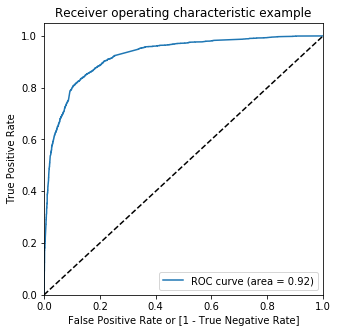

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Id,predicted,Lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4714,0,0.167349,4714,0,17,1,1,0,0,0,0,0,0,0,0
5794,1,0.974656,5794,1,97,1,1,1,1,1,1,1,1,1,1
876,1,0.053928,876,0,5,1,0,0,0,0,0,0,0,0,0
7767,1,0.721225,7767,1,72,1,1,1,1,1,1,1,1,0,0
7895,1,0.296118,7895,0,30,1,1,1,0,0,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382344  1.000000  0.000000
0.1   0.1  0.741346  0.960548  0.605656
0.2   0.2  0.817402  0.915282  0.756812
0.3   0.3  0.840426  0.867525  0.823650
0.4   0.4  0.856621  0.825581  0.875835
0.5   0.5  0.861226  0.789037  0.905913
0.6   0.6  0.845189  0.711794  0.927763
0.7   0.7  0.835662  0.652409  0.949100
0.8   0.8  0.820102  0.575581  0.971465
0.9   0.9  0.765640  0.408638  0.986632


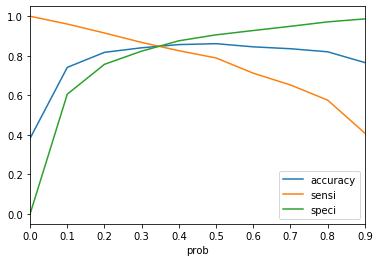

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

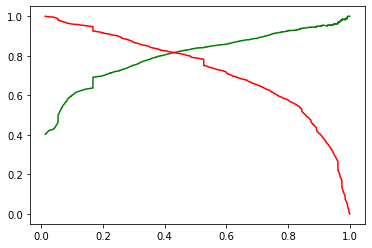

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [127]:
#Using 0.33 as a cutoff and then categorizing data
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Id,predicted,Lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4714,0,0.167349,4714,0,17,1,1,0,0,0,0,0,0,0,0,0
5794,1,0.974656,5794,1,97,1,1,1,1,1,1,1,1,1,1,1
876,1,0.053928,876,0,5,1,0,0,0,0,0,0,0,0,0,0
7767,1,0.721225,7767,1,72,1,1,1,1,1,1,1,1,0,0,1
7895,1,0.296118,7895,0,30,1,1,1,0,0,0,0,0,0,0,0


In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8478882184820578

In [129]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3283,  607],
       [ 351, 2057]], dtype=int64)

In [130]:
TP_1 = confusion2[1,1] # true positive 
TN_1 = confusion2[0,0] # true negatives
FP_1 = confusion2[0,1] # false positives
FN_1 = confusion2[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP_1 / float(TP_1+FN_1)

0.854235880398671

In [132]:
# Let us calculate specificity
TN_1 / float(TN_1+FP_1)

0.8439588688946016

In [133]:
# Calculate false postive rate - predicting lead when customer was not a lead
print(FP_1/ float(TN_1+FP_1))

0.15604113110539847


In [134]:
# Positive predictive value 
print (TP_1 / float(TP_1+FP_1))

0.7721471471471472


In [135]:
# Negative predictive value
print (TN_1 / float(TN_1+ FN_1))

0.903412217941662


### Time for testing "test set" 

In [136]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [137]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
9122,0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0
4366,0,0.294118,0.043502,0,0,0,0,0,0,1,0,0,0
4044,0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1
5527,0,0.000000,0.000000,0,1,0,0,1,0,1,0,0,0
2752,0,0.176471,0.030995,0,0,0,0,0,0,1,0,0,0


In [138]:
X_test_sm = sm.add_constant(X_test)

In [139]:
y_test_pred = res.predict(X_test_sm)

In [140]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [141]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [142]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [143]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [145]:
y_pred_final.head()

,Converted,ID,0
0,0,9122,0.167349
1,0,4366,0.051053
2,1,4044,0.967776
3,0,5527,0.053928
4,0,2752,0.045786


In [146]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [147]:
y_pred_final.head()

,Converted,ID,Converted_Prob
0,0,9122,0.167349
1,0,4366,0.051053
2,1,4044,0.967776
3,0,5527,0.053928
4,0,2752,0.045786


In [148]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

### Addilng Lead Score

In [149]:
y_pred_final['Lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,ID,Converted_Prob,final_predicted,Lead_score
0,0,9122,0.167349,0,17
1,0,4366,0.051053,0,5
2,1,4044,0.967776,1,97
3,0,5527,0.053928,0,5
4,0,2752,0.045786,0,5
5,1,4165,0.375775,1,38
6,0,8744,0.001530,0,0
7,0,1600,0.603254,1,60
8,1,7641,0.996399,1,100
9,0,4741,0.057797,0,6


In [150]:
#Checking if we have 80% correct prediction [WHICH IS TRUE POSITIVE]
check_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
check_df['final_predicted'].value_counts()

1    859
0    166
Name: final_predicted, dtype: int64

In [151]:
859/(859+166)

0.8380487804878048

#### Over 80% correct score categorization for hot leads

### Checking the model parameters for evauation

In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8240740740740741

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1366,  309],
       [ 166,  859]], dtype=int64)

In [154]:
TP_2 = confusion2[1,1] # true positive 
TN_2 = confusion2[0,0] # true negatives
FP_2 = confusion2[0,1] # false positives
FN_2 = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP_2 / float(TP_2+FN_2)

0.8380487804878048

In [156]:
# Let us calculate specificity
TN_2 / float(TN_2+FP_2)

0.8155223880597015

In [157]:
print("Train Accuracy",(TP_1+TN_1)/(TP_1+TN_1+FP_1+FN_1))
print("Train Sensitivity",(TP_1)/(TP_1+FN_1))
print("Train Specificity",(TN_1)/(TN_1+FP_1))

print("------------------------------")
print("Test Accuracy",(TP_2+TN_2)/(TP_2+TN_2+FP_2+FN_2))
print("Test Sensitivity",(TP_2)/(TP_2+FN_2))
print("Test Specificity",(TN_2)/(TN_2+FP_2))

Train Accuracy 0.8478882184820578
Train Sensitivity 0.854235880398671
Train Specificity 0.8439588688946016
------------------------------
Test Accuracy 0.8240740740740741
Test Sensitivity 0.8380487804878048
Test Specificity 0.8155223880597015


## The model is performing well on both the train data and the test data. We will consider this model as our final model.